In [40]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import networkx as nx
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping,CSVLogger

In [41]:
P_DIR = "D:\df\\ai\cora"

In [42]:
citations = pd.read_csv(os.path.join(P_DIR,"cora_cites.csv"),names =["target","source"],header=1)
print(f"shape of citations is {citations.shape}")
citations.head(4)

shape of citations is (5428, 2)


,target,source
0,35,1033
1,35,1688
2,35,1956
3,35,8865


In [43]:
papers = pd.read_csv(os.path.join(P_DIR,"cora.content"),sep="\t")
features = papers.shape[1]
print(features)
columns = ["paper_id"]+[f"fet_{idx}" for idx in range(features-2)]+["subject"]
print(columns)
papers = pd.read_csv(os.path.join(P_DIR,"cora.content"),sep="\t",names = columns)
papers.head(5)

1435
['paper_id', 'fet_0', 'fet_1', 'fet_2', 'fet_3', 'fet_4', 'fet_5', 'fet_6', 'fet_7', 'fet_8', 'fet_9', 'fet_10', 'fet_11', 'fet_12', 'fet_13', 'fet_14', 'fet_15', 'fet_16', 'fet_17', 'fet_18', 'fet_19', 'fet_20', 'fet_21', 'fet_22', 'fet_23', 'fet_24', 'fet_25', 'fet_26', 'fet_27', 'fet_28', 'fet_29', 'fet_30', 'fet_31', 'fet_32', 'fet_33', 'fet_34', 'fet_35', 'fet_36', 'fet_37', 'fet_38', 'fet_39', 'fet_40', 'fet_41', 'fet_42', 'fet_43', 'fet_44', 'fet_45', 'fet_46', 'fet_47', 'fet_48', 'fet_49', 'fet_50', 'fet_51', 'fet_52', 'fet_53', 'fet_54', 'fet_55', 'fet_56', 'fet_57', 'fet_58', 'fet_59', 'fet_60', 'fet_61', 'fet_62', 'fet_63', 'fet_64', 'fet_65', 'fet_66', 'fet_67', 'fet_68', 'fet_69', 'fet_70', 'fet_71', 'fet_72', 'fet_73', 'fet_74', 'fet_75', 'fet_76', 'fet_77', 'fet_78', 'fet_79', 'fet_80', 'fet_81', 'fet_82', 'fet_83', 'fet_84', 'fet_85', 'fet_86', 'fet_87', 'fet_88', 'fet_89', 'fet_90', 'fet_91', 'fet_92', 'fet_93', 'fet_94', 'fet_95', 'fet_96', 'fet_97', 'fet_98', 'f

,paper_id,fet_0,fet_1,fet_2,fet_3,fet_4,fet_5,fet_6,fet_7,fet_8,...,fet_1424,fet_1425,fet_1426,fet_1427,fet_1428,fet_1429,fet_1430,fet_1431,fet_1432,subject
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


In [44]:
print(papers["subject"].value_counts())

Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: subject, dtype: int64


In [45]:
LABELS = sorted(papers["subject"].unique())
class_idx = {name:idx for idx,name in enumerate(LABELS)}
papers_idx = {name:idx for idx,name in enumerate(sorted(papers["paper_id"].unique()))}

papers["subject"] = papers["subject"].apply(lambda name:class_idx[name])
papers["paper_id"] = papers["paper_id"].apply(lambda name:papers_idx[name])
citations["target"] = citations["target"].apply(lambda name:papers_idx[name])
citations["source"] = citations["source"].apply(lambda name:papers_idx[name])

In [56]:
print(len(LABELS))

7


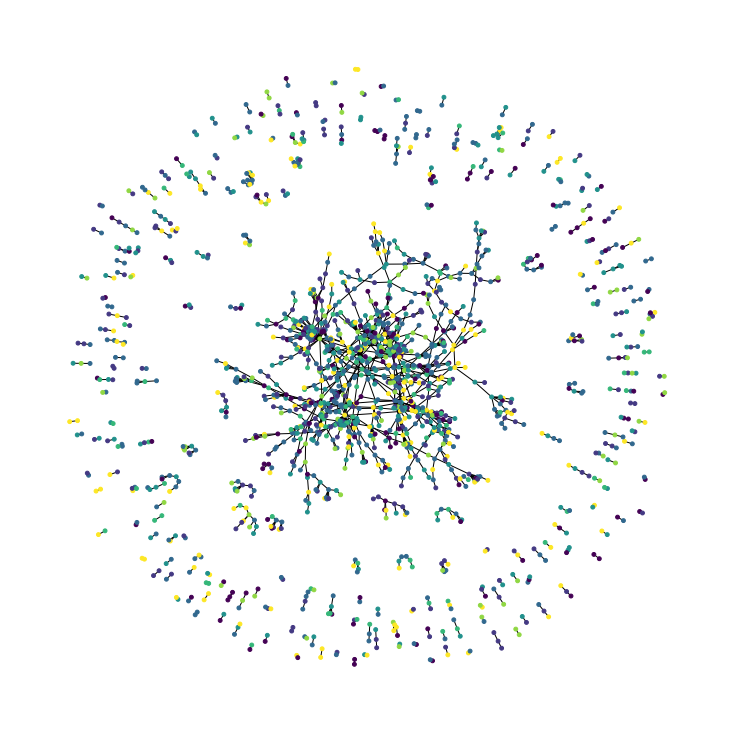

In [46]:
plt.figure(figsize=(10,10))
cora_graph = nx.from_pandas_edgelist(citations.sample(n=1500))
subjects = list(papers[papers["paper_id"].isin(list(cora_graph.nodes))]["subject"])
nx.draw_spring(cora_graph,node_size = 15,node_color = subjects)

In [47]:
train_data,test_data = train_test_split(papers,test_size=0.3,random_state=18)
# print(train["subject"].unique())
print(f"train data shape:{train_data.shape}")
print(f"test data shape:{test_data.shape}")

train_indices = train_data["paper_id"].to_numpy()
test_indices = test_data["paper_id"].to_numpy()

train_labels = train_data["subject"].to_numpy()
test_labels = test_data["subject"].to_numpy()

edges = tf.convert_to_tensor(citations)
node_features = tf.convert_to_tensor(papers.sort_values("paper_id").iloc[:,1:-1])

print(f"node features shape : {node_features.shape}")
print(f"edges shape : {edges.shape}")

train data shape:(1895, 1435)
test data shape:(813, 1435)
node features shape : (2708, 1433)
edges shape : (5428, 2)


In [48]:
node_features

<tf.Tensor: shape=(2708, 1433), dtype=int64, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)>

# Build the Model

In [53]:
class GraphAttention(layers.Layer):
    def __init__(self,units,regularizer=None):
        super(GraphAttention,self).__init__()
        self.units = units
        self.weight_init = tf.keras.initializers.glorot_uniform()
        self.weight_regularization = tf.keras.regularizers.get(regularizer)

    def build(self,input_shape):
        self.wh = self.add_weight(name="weight"
            ,shape=(input_shape[0][-1],self.units)
            ,regularizer=self.weight_regularization
            ,initializer=self.weight_init
            ,trainable=True)

        self.w_attention = self.add_weight(name="weight_attention",
                                           shape=(self.units*2,1),
                                           initializer=self.weight_init,
                                           regularizer=self.weight_regularization,
                                           trainable=True)

    def call(self,inputs):
        node_features ,edges = inputs

        # change dim of nodes from f to f'
        node_features_trans = tf.matmul(node_features,self.wh)

        edges_features = tf.gather(node_features_trans,edges)
        edges_features = tf.reshape(edges_features,shape=(edges.shape[0],-1))

        attention = tf.nn.leaky_relu(tf.matmul(edges_features,self.w_attention))

        attention = tf.squeeze(attention,-1)


        attention = tf.math.exp(tf.clip_by_value(attention,-2,2))
        attention_sum = tf.math.unsorted_segment_sum(attention,segment_ids=edges[:,0],num_segments=tf.reduce_max(edges[:,0])+1)
        attention_sum = tf.repeat(attention_sum,tf.math.bincount(tf.cast(edges[:,0],"int32")))
        attention_norm = attention / attention_sum

        node_neighbors = tf.gather(node_features_trans,edges[:,1])

        out = tf.math.unsorted_segment_sum(
            data=node_neighbors*attention_norm[:,tf.newaxis],
            segment_ids = edges[:,0],
            num_segments=node_features.shape[0]
        )
        return out
    


class MultiHeadAttention(layers.Layer):
    def __init__(self,units,num_heads = 8,merge_type = "concat"):
        super(MultiHeadAttention,self).__init__()
        self.num_heads = num_heads
        self.merge_type = merge_type
        self.attention_layers = [GraphAttention(units) for _ in range(num_heads)]
    
    def call(self,inputs):
        atom_features,pair_indices = inputs
        outputs = [
            attention_layer([atom_features,pair_indices])
            for attention_layer in self.attention_layers
        ]
        if self.merge_type == "concat":
            outputs = tf.concat(outputs,axis = -1)
        else :
            outputs = tf.reduce_mean(tf.stack(outputs,axis = -1),axis = -1)
        return tf.nn.relu(outputs)


class GraphAttentionNetwork(tf.keras.Model):
    def __init__(self,node_features,edges,units,num_layers,ouput_dim,num_heads=8):
        super(GraphAttentionNetwork,self).__init__()
        self.node_features = node_features
        self.edges = edges
        self.output_layer = layers.Dense(ouput_dim)
        self.prepare = layers.Dense(units*num_heads,activation="relu")
        self.attention_layers = [MultiHeadAttention(units,num_heads) for _ in range(num_layers)]
    
    def call(self,inputs):
        node_features,edges = inputs
        x = self.prepare(node_features)
        for attention_layer in self.attention_layers:
            x = attention_layer([x,edges]) + x
        
        return self.output_layer(x)
    
    def train_step(self, data):
        indices, labels = data

        with tf.GradientTape() as tape:
            # Forward pass
            outputs = self([self.node_features, self.edges])
            # Compute loss
            loss = self.compiled_loss(labels, tf.gather(outputs, indices))
        # Compute gradients
        grads = tape.gradient(loss, self.trainable_weights)
        # Apply gradients (update weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        # Update metric(s)
        self.compiled_metrics.update_state(labels, tf.gather(outputs, indices))

        return {m.name: m.result() for m in self.metrics}

    def predict_step(self, data):
        indices = data
        # Forward pass
        outputs = self([self.node_features, self.edges])
        # Compute probabilities
        return tf.nn.softmax(tf.gather(outputs, indices))

    def test_step(self, data):
        indices, labels = data
        outputs = self([self.node_features, self.edges])
        loss = self.compiled_loss(labels, tf.gather(outputs, indices))
     
     
        self.compiled_metrics.update_state(labels, tf.gather(outputs, indices))

        return {m.name: m.result() for m in self.metrics}


In [60]:
# Define hyper-parameters
HIDDEN_UNITS = 100
NUM_HEADS = 8
NUM_LAYERS = 3
CLASSES = len(LABELS)

NUM_EPOCHS = 100
BATCH_SIZE = 256
VALIDATION_SPLIT = 0.1
LEARNING_RATE = 3e-1
MOMENTUM = 0.9

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(LEARNING_RATE, momentum=MOMENTUM)
accuracy_fn = tf.keras.metrics.SparseCategoricalAccuracy(name="acc")
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_acc", min_delta=1e-5, patience=5, restore_best_weights=True
)

# Build model
gat_model = GraphAttentionNetwork(
    node_features, edges, HIDDEN_UNITS, NUM_LAYERS, CLASSES, NUM_HEADS
)

# Compile model
gat_model.compile(loss=loss_fn, optimizer=optimizer, metrics=[accuracy_fn])

gat_model.fit(
    x=train_indices,
    y=train_labels,
    validation_split=VALIDATION_SPLIT,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    callbacks=[early_stopping],
    verbose=2,
)



Epoch 1/100


c:\dev\python\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


7/7 - 18s - loss: 1.7248 - acc: 0.3718 - val_loss: 1.2855 - val_acc: 0.5789 - 18s/epoch - 3s/step
Epoch 2/100
7/7 - 6s - loss: 0.9019 - acc: 0.7120 - val_loss: 0.7683 - val_acc: 0.7421 - 6s/epoch - 795ms/step
Epoch 3/100
7/7 - 6s - loss: 0.4729 - acc: 0.8680 - val_loss: 0.8032 - val_acc: 0.7789 - 6s/epoch - 840ms/step
Epoch 4/100
7/7 - 5s - loss: 0.3168 - acc: 0.9079 - val_loss: 0.6924 - val_acc: 0.7842 - 5s/epoch - 650ms/step
Epoch 5/100
7/7 - 5s - loss: 0.1805 - acc: 0.9548 - val_loss: 0.6409 - val_acc: 0.8053 - 5s/epoch - 662ms/step
Epoch 6/100
7/7 - 5s - loss: 0.1342 - acc: 0.9695 - val_loss: 0.5805 - val_acc: 0.7789 - 5s/epoch - 696ms/step
Epoch 7/100
7/7 - 4s - loss: 0.0810 - acc: 0.9812 - val_loss: 0.5716 - val_acc: 0.8158 - 4s/epoch - 640ms/step
Epoch 8/100
7/7 - 5s - loss: 0.0513 - acc: 0.9935 - val_loss: 0.5298 - val_acc: 0.8053 - 5s/epoch - 653ms/step
Epoch 9/100
7/7 - 5s - loss: 0.0344 - acc: 0.9947 - val_loss: 0.5413 - val_acc: 0.8263 - 5s/epoch - 645ms/step
Epoch 10/100
7

In [61]:
_, test_accuracy = gat_model.evaluate(x=test_indices, y=test_labels, verbose=0)

print(f"\nTest Accuracy {test_accuracy*100:.1f}%")


Test Accuracy 78.6%
